<a href="https://colab.research.google.com/github/scoobiii/COVID-20/blob/master/Coronavirus_worldwide_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

from fbprophet import Prophet

In [0]:
covid = pd.read_csv('https://raw.githubusercontent.com/sandeco/CanalSandeco/master/covid-19/covid_19_data.csv')

In [3]:
covid.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,2020-03-30 22:58:55,94.0,0.0,0.0
10354,10355,03/30/2020,Xinjiang,Mainland China,2020-03-30 22:58:55,76.0,3.0,73.0
10355,10356,03/30/2020,Yukon,Canada,2020-03-30 22:58:55,4.0,0.0,0.0
10356,10357,03/30/2020,Yunnan,Mainland China,2020-03-30 22:58:55,180.0,2.0,172.0
10357,10358,03/30/2020,Zhejiang,Mainland China,2020-03-30 22:58:55,1255.0,1.0,1225.0


In [0]:
covid.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

In [5]:
covid.tail()

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
10353,10354,03/30/2020,Wyoming,US,2020-03-30 22:58:55,94.0,0.0,0.0
10354,10355,03/30/2020,Xinjiang,Mainland China,2020-03-30 22:58:55,76.0,3.0,73.0
10355,10356,03/30/2020,Yukon,Canada,2020-03-30 22:58:55,4.0,0.0,0.0
10356,10357,03/30/2020,Yunnan,Mainland China,2020-03-30 22:58:55,180.0,2.0,172.0
10357,10358,03/30/2020,Zhejiang,Mainland China,2020-03-30 22:58:55,1255.0,1.0,1225.0


### AGRUPANDO POR DATA

In [6]:
mortes = covid.groupby('Date').sum()['Deaths'].reset_index()
mortes.tail()

,Date,Deaths
64,03/26/2020,23970.0
65,03/27/2020,27198.0
66,03/28/2020,30652.0
67,03/29/2020,33925.0
68,03/30/2020,37582.0


## PLOTANDO AS MORTES

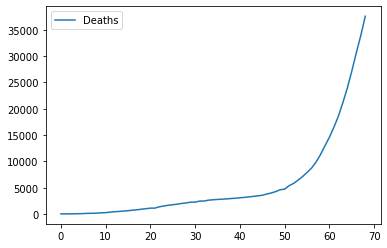

In [7]:
mortes.plot()

![alt text](https://miro.medium.com/max/864/1*HgDtNHGhlgnVg61zf86ZMw.png)

# **Prophet**


O Profeta segue o modelo da API Scikit Learn, onde você cria uma instância da classe Prophet, em seguida, chama os métodos "fit" e "predict".


O Prophet é construído com seu back-end em STAN, uma linguagem de programação probabilística. Isso permite que o Prophet tenha muitas das vantagens oferecidas pelas estatísticas bayesianas, incluindo sazonalidade, inclusão de conhecimento de domínio e intervalos de confiança para criar uma estimativa de risco baseada em dados.

A entrada para o Prophet é flexível porque permite que um Dataframe do pandas possa ser usado como entrada de dados


Referências:
- https://facebook.github.io/prophet/
- https://facebook.github.io/prophet/docs/
- https://github.com/facebook/prophet




## Formato das colunas de dados: **ds** e **y**. 

A coluna **ds** (date) deve ter o formato esperado pelo Pandas, idealmente AAAA-MM-DD para uma data ou AAAA-MM-DD HH: MM: SS para timestamp. 

A coluna **y**  deve ser numérica e representa a medida que desejamos prever.

CRIANDO AS COLUNAS 


*   ds
*   y



In [8]:
mortes.tail()

,Date,Deaths
64,03/26/2020,23970.0
65,03/27/2020,27198.0
66,03/28/2020,30652.0
67,03/29/2020,33925.0
68,03/30/2020,37582.0


In [9]:
mortes.columns = ['ds','y']
mortes.tail()

,ds,y
64,03/26/2020,23970.0
65,03/27/2020,27198.0
66,03/28/2020,30652.0
67,03/29/2020,33925.0
68,03/30/2020,37582.0


In [10]:
mortes['ds'] = pd.to_datetime(mortes['ds'])
mortes.tail()

,ds,y
64,2020-03-26,23970.0
65,2020-03-27,27198.0
66,2020-03-28,30652.0
67,2020-03-29,33925.0
68,2020-03-30,37582.0


## **Previsão de MORTES da COVID-19 no mundo**

Vamos realizar uma previsão de uma semana (periods=30), com intervalos de 95%. 

# **Confiança**

Nas Séries Temporais a tendencia muda o tempo todo. Isso é histórico. Por isso 
é impossível ter certeza, então faremos a coisa mais razoável possível e assumimos que o futuro sofrerá mudanças de tendência.

Nesse caso, assumiremos um intervalo de confiança de 95%, ou seja admitimos um erro de 5%. 


In [0]:
dias = 30

In [12]:
m = Prophet(interval_width=0.95, growth=)
m.fit(mortes)
futuro = m.make_future_dataframe(periods=dias)
futuro.tail(dias)

SyntaxError: ignored

In [0]:
previsao = m.predict(futuro)
previsao.tail(dias)

In [0]:
previsao[['ds', 'yhat_lower', 'yhat', 'yhat_upper']].tail(dias)

In [0]:
confirmed_forecast_plot = m.plot(previsao)